# Bloque 6 Electromiografía: Práctica 9 - Redes Neuronales


En esta práctica, nos adentraremos en el fascinante mundo de las redes neuronales, una de las tecnologías más revolucionarias en el campo de la inteligencia artificial. Comenzaremos explorando los conceptos básicos del **perceptrón simple** y el **perceptrón múltiple**, dos tipos fundamentales de redes neuronales.

## Objetivos de la Práctica

1. **Comprender el Perceptrón Simple**: Aprenderemos cómo funciona el perceptrón simple, su estructura y su capacidad para resolver problemas de clasificación lineal.
2. **Programación desde Cero**: Implementaremos un perceptrón simple desde cero, utilizando Python. Esto nos permitirá entender en profundidad los mecanismos internos de una red neuronal básica.
3. **Explorar el Perceptrón Múltiple**: Analizaremos cómo el perceptrón múltiple extiende las capacidades del perceptrón simple para resolver problemas más complejos.
4. **Uso de Scikit-learn**: Finalmente, veremos cómo utilizar la biblioteca **scikit-learn** para implementar y entrenar perceptrones de manera eficiente, aprovechando sus funcionalidades avanzadas.

## Contenidos

- **Teoría del Perceptrón Simple**: Estructura, función de activación y algoritmo de aprendizaje.
- **Implementación en Python**: Paso a paso, desde la inicialización de pesos hasta el ajuste mediante el algoritmo de aprendizaje.
- **Perceptrón Múltiple**: Introducción y ejemplos de aplicación.
- **Scikit-learn**: Uso de esta poderosa herramienta para simplificar la implementación y el entrenamiento de redes neuronales.

Al finalizar esta práctica, tendrás una comprensión sólida de los fundamentos de las redes neuronales y estarás preparado para abordar problemas más complejos utilizando herramientas avanzadas como scikit-learn.

### 1 Perceptrón simple desde 0

Genere un código para entrenar un perceptron simple con función de activación lineal desde cero e intente estimar la función OR, AND y XOR. Haga 10 etapas de entrenamiento

In [ ]:
import numpy as np  # Importar la biblioteca numpy para manejo de arrays y funciones matemáticas
import plotly.graph_objects as go  # Importar plotly para crear gráficos interactivos


# Función escalón (función de activación)
def step_function(sum):
    if sum >= 0:
        return 1
    return -1


# Función para entrenar el perceptrón
def EntrenaPerceptron(xi, yi, w):
    ypred = np.dot(xi, w) # Calcular la predicción
    if step_function(ypred) != yi:  # Si la predicción es incorrecta
        tasa = 1e-1  # Tasa de aprendizaje
        error = yi - step_function(ypred) # Calcular el error
        dw = tasa * error * xi  # Calcular el ajuste de los pesos
        w += dw # Actualizar los pesos
    return w


## CASO OR

# -1 es 0 lógico y 1 es 1 lógico
xi = np.array([[1, -1, -1], [1, -1, 1], [1, 1, -1], [1, 1, 1]])  # Entradas
yi = np.array([-1, 1, 1, 1])  # Salidas deseadas

## Definimos el nº de entrenamientos
N = 10

# Inicializamos w
w = np.random.uniform(-1, 1, 3) * 0  # Inicializar los pesos
error = []  # Lista para almacenar el error

for i in range(N):
    for j in range(len(yi)):
        w = EntrenaPerceptron(xi[j, :], yi[j], w)  # Entrenar el perceptrón
        softVal = np.dot(xi, w)  # Calcular las predicciones
        hardVal = softVal
        hardVal[np.where(hardVal > 0)] = 1  # Aplicar la función escalón
        hardVal[np.where(hardVal <= 0)] = -1
        error.append(np.mean(np.abs(hardVal - yi)))  # Calcular el error medio

fig = go.Figure()
fig.add_trace(
    go.Scatter(y=error, name="OR")
)  # Añadir la traza del error para el caso OR

## CASO AND
# -1 es 0 lógico y 1 es 1 lógico
xi = np.array([[1, -1, -1], [1, -1, 1], [1, 1, -1], [1, 1, 1]])  # Entradas
yi = np.array([-1, -1, -1, 1])  # Salidas deseadas

## Definimos el nº de entrenamientos
N = 10

# Inicializamos w
w = np.random.uniform(-1, 1, 3) * 0  # Inicializar los pesos
error = []  # Lista para almacenar el error

for i in range(N):
    for j in range(len(yi)):
        w = EntrenaPerceptron(xi[j, :], yi[j], w)  # Entrenar el perceptrón
        softVal = np.dot(xi, w)  # Calcular las predicciones
        hardVal = softVal
        hardVal[np.where(hardVal > 0)] = 1  # Aplicar la función escalón
        hardVal[np.where(hardVal <= 0)] = -1
        error.append(np.mean(np.abs(hardVal - yi)))  # Calcular el error medio

fig.add_trace(
    go.Scatter(y=error, name="AND")
)  # Añadir la traza del error para el caso AND

## CASO XOR
# -1 es 0 lógico y 1 es 1 lógico
xi = np.array([[1, -1, -1], [1, -1, 1], [1, 1, -1], [1, 1, 1]])  # Entradas
yi = np.array([-1, 1, 1, -1])  # Salidas deseadas

## Definimos el nº de entrenamientos
N = 10

# Inicializamos w
w = np.random.uniform(-1, 1, 3) * 0  # Inicializar los pesos
error = []  # Lista para almacenar el error

for i in range(N):
    for j in range(len(yi)):
        w = EntrenaPerceptron(xi[j, :], yi[j], w)  # Entrenar el perceptrón
        softVal = np.dot(xi, w)  # Calcular las predicciones
        hardVal = softVal
        hardVal[np.where(hardVal > 0)] = 1  # Aplicar la función escalón
        hardVal[np.where(hardVal <= 0)] = -1
        error.append(np.mean(np.abs(hardVal - yi)))  # Calcular el error medio

fig.add_trace(
    go.Scatter(y=error, name="XOR")
)  # Añadir la traza del error para el caso XOR

# Agregar título y etiquetas a la gráfica
fig.update_layout(
    title="Evolución del error en el entrenamiento del perceptrón -> 1 capa",
    xaxis_title="Iteraciones",
    yaxis_title="Error",
    template="plotly_white"
)
fig.show()  # Mostrar la figura

## Funciones de activación

Una vez realizada la implementación de un perceptrón simple añadiremos alguna función de activación, podemos probar con $tanh(x)$, cuya derivada es $(1-tanh(x)^2)$. Recordad que $$\Delta w = w + \gamma \frac{\partial E}{\partial w}$$
Ahora vamos a probarlo con una base de datos ficticia creada mediante scickit



In [ ]:
import numpy as np  # Importar la biblioteca numpy para manejo de arrays y funciones matemáticas
import plotly.graph_objects as go  # Importar plotly para crear gráficos interactivos
from sklearn.neural_network import MLPClassifier  # Importar MLPClassifier de sklearn para redes neuronales
from sklearn.datasets import make_classification  # Importar make_classification de sklearn para generar datos de clasificación
from sklearn.model_selection import train_test_split  # Importar train_test_split de sklearn para dividir los datos en entrenamiento y prueba

# Función escalón (función de activación)
def step_function(sum):
    if sum >= 0:
        return 1
    return -1

# Función para entrenar el perceptrón
def EntrenaPerceptron(xi, yi, w):
    ypred = 1 - np.tanh(np.dot(xi, w)) ** 2 # Calcular la predicción usando la función tangente hiperbólica
    if step_function(ypred) != yi:  # Si la predicción es incorrecta
        tasa = 1e-1  # Tasa de aprendizaje
        error = yi - ypred # Calcular el error
        dw = tasa * error * 1 - np.tanh(ypred) ** 2 * xi  # Calcular el ajuste de los pesos
        w += dw # Actualizar los pesos
    return w

# Generar datos de clasificación
X, y = make_classification(
    n_samples=100,  # Número de muestras
    random_state=1,  # Semilla para reproducibilidad
    class_sep=1,  # Separación entre clases
    n_features=2,  # Número de características
    n_informative=2,  # Número de características informativas
    n_redundant=0,  # Número de características redundantes
)
y = (y - 0.5) * 2  # Dejar y entre -1 y 1

X = np.hstack((np.ones((len(y), 1)), X))  # Añadir el sesgo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

## Definimos el nº de entrenamientos
N = 100

# Inicializamos w
w = np.random.uniform(-1, 1, X.shape[1]) * 1e-3  # Inicializar los pesos
error = []  # Lista para almacenar el error

for i in range(N):
    for j in range(len(y_train)):
        w = EntrenaPerceptron(X_train[j, :], y_train[j], w)  # Entrenar el perceptrón
        softVal = 1 - np.tanh(np.dot(X_train, w)) ** 2  # Calcular las predicciones usando la función tangente hiperbólica
        error.append(np.mean(np.abs(np.sign(softVal) - y_train)))  # Calcular el error medio

# Crear la gráfica del error
fig = go.Figure()
fig.add_trace(go.Scatter(y=error, name="Error en el entrenamiento"))  # Añadir la traza del error
fig.update_layout(
    title="Evolución del error durante el entrenamiento",
    xaxis_title="Iteraciones",
    yaxis_title="Error medio",
    template="plotly_white"
)
fig.show()

# Calcular las predicciones para el conjunto de prueba
yPred = 1 - np.tanh(np.dot(X_test, w)) ** 2

# Crear la gráfica de las predicciones
fig2 = go.Figure()
fig2.add_trace(
    go.Scatter(
        x=X_test[:, 1],  # Coordenadas x
        y=X_test[:, 2],  # Coordenadas y
        mode="markers",  # Modo de trazado en marcadores
        marker=dict(
            size=10,  # Tamaño de los marcadores
            color=np.sign(yPred),  # Color por variable
            colorscale="tealrose",  # Escala de colores
            showscale=True,  # Mostrar la escala de colores
        ),
    )
)
fig2.update_layout(
    title="Clasificación del conjunto de prueba con Perceptrón",
    xaxis_title="Característica 1",
    yaxis_title="Característica 2",
    template="plotly_white"
)
fig2.show()

## Implementación de Red de dos Capas

Siguiendo el ejemplo propuesto en las clases teóricas vamos a implementar una red neuronal de 2 capas con una neurona en cada una de ellas. La función de activación será $\varphi(x) = sigmoid(x)$ y usaremos la función XOR como prueba. 

Instrucciones:
- La función de activación será $\varphi(a) = sigmoid(a) \xrightarrow{\partial a}(\varphi(a)\cdot(1-\varphi(a))) $
- Definimos el error como $E = \frac{1}{2}\sum_k^K(\hat y_k -y_k)^2$
- Definimos la salidas de la capa oculta como $a_j = \sum_i^Dw_{ji}^1x_i$ y $z_i = sigmoid(a_i)$
- Definimos la salida de la red como $\hat y_k = \sum_j^Mw_{kj}^2z_j $
- Calculamos el error hacia adelante $\delta_k=\hat y_k -y_k$
- Retropropagamos: $\delta_j = (1-z_j^2)\sum_k^Kw_{kj}\delta_k$ 
- Obtenemos las $\Delta w$ para cada capa $\Delta w_{ji}^1 =\delta_jx_i$ y $\Delta w_{kj}^2 =\delta_kz_j$

In [ ]:
import numpy as np  # Importar la biblioteca numpy para manejo de arrays y funciones matemáticas
import plotly.graph_objects as go  # Importar plotly para crear gráficos interactivos


# Función de activación sigmoidea
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


# Derivada de la función sigmoidea
def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)


# Función para la propagación hacia adelante
def Forward(x, w1, w2, w3):
    xi = np.hstack([1, x])  # Añadir el sesgo a la entrada
    a01 = w1.T @ xi  # Calcular la activación de la primera neurona oculta
    a02 = w2.T @ xi  # Calcular la activación de la segunda neurona oculta
    aj = np.hstack([a01, a02])  # Agrupar las activaciones
    zj = np.hstack([1, sigmoid(aj)])  # Aplicar la función sigmoidea y añadir el sesgo
    ypred = w3 @ zj  # Calcular la salida
    return ypred, zj


# Función para la propagación hacia atrás
def Backward(x, y, w1, w2, w3):
    ypred, zj = Forward(x, w1, w2, w3)  # Propagación hacia adelante

    xi = np.hstack([1, x])  # Añadir el sesgo a la entrada
    tasa = 5e-1  # Tasa de aprendizaje
    a01 = w1 @ xi  # Calcular la activación de la primera neurona oculta
    a02 = w2 @ xi  # Calcular la activación de la segunda neurona oculta
    aj = np.hstack([a01, a02])  # Agrupar las activaciones
    dPhi = sigmoid_derivative(aj)  # Calcular la derivada de la función sigmoidea
    deltaK = ypred - y  # Calcular el error de salida

    deltaj1 = dPhi[0] * w3[1] * deltaK  # Calcular el error de la primera neurona oculta
    deltaj2 = dPhi[1] * w3[2] * deltaK  # Calcular el error de la segunda neurona oculta

    dW1 = (
        -tasa * deltaj1 * xi
    )  # Calcular el ajuste de los pesos de la primera neurona oculta
    dW2 = (
        -tasa * deltaj2 * xi
    )  # Calcular el ajuste de los pesos de la segunda neurona oculta
    dW3 = -tasa * deltaK * zj  # Calcular el ajuste de los pesos de la neurona de salida

    w1 = w1 + dW1  # Actualizar los pesos de la primera neurona oculta
    w2 = w2 + dW2  # Actualizar los pesos de la segunda neurona oculta
    w3 = w3 + dW3  # Actualizar los pesos de la neurona de salida

    return w1, w2, w3


## CASO XOR
# -1 es 0 lógico y 1 es 1 lógico
xi = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])  # Entradas
yi = np.array([-1, 1, 1, -1])  # Salidas deseadas

## Definimos el nº de entrenamientos
N = 75

np.random.seed(10)
# Inicializamos w
w1 = np.random.uniform(-1, 1, 3) * 1  # Pesos de la primera neurona oculta
w2 = np.random.uniform(-1, 1, 3) * 1  # Pesos de la segunda neurona oculta
w3 = np.random.uniform(-1, 1, 3) * 1  # Pesos de la neurona de salida
error = []  # Lista para almacenar el error

for i in range(N):
    auxError = []
    for j in range(len(yi)):
        w1, w2, w3 = Backward(xi[j, :], yi[j], w1, w2, w3)  # Entrenar la red
        ypred, _ = Forward(xi[j, :], w1, w2, w3)  # Propagación hacia adelante
        auxError.append((np.abs(ypred - yi[j])))  # Calcular el error absoluto
    error.append(np.mean(auxError))  # Calcular el error medio

# Crear la gráfica del error
fig = go.Figure()
fig.add_trace(go.Scatter(y=error, name="XOR"))  # Añadir la traza del error

# Agregar título y etiquetas a la gráfica
fig.update_layout(
    title="Evolución del error en el entrenamiento de la red neuronal de 2 capas para XOR",
    xaxis_title="Iteraciones",
    yaxis_title="Error medio",
    template="plotly_white"
)

fig.show()

# Imprimir las predicciones finales
i = 0
for x in xi:
    ypred, _ = Forward(x, w1, w2, w3)  # Propagación hacia adelante
    print(
        "yPred:  %f  yReal: %f " % (ypred, yi[i])
    )  # Imprimir la predicción y el valor real
    i = i + 1

yPred:  -1.000000  yReal: -1.000000 
yPred:  1.000000  yReal: 1.000000 
yPred:  1.000000  yReal: 1.000000 
yPred:  -1.000000  yReal: -1.000000 


## Implementación de scikit-learn

Para crear modelos basados en redes neuronales con scikit-learn, se utilizan las clases `sklearn.neural_network.MLPRegressor` para regresión y `sklearn.neural_network.MLPClassifier` para clasificación.

Son muchos los argumentos que controlan el comportamiento de este tipo de modelos. Afortunadamente, los responsables de su implementación han establecido valores por defecto que suelen funcionar adecuadamente en muchos escenarios. A continuación, se muestran los más influyentes:

- **hidden_layer_sizes**: número y tamaño de las capas ocultas. Por ejemplo, `(100)` para una única capa oculta con 100 neuronas, y `(16, 16)` para dos capas ocultas de 16 neuronas cada una. El valor por defecto es `(100,)`.
- **activation**: función de activación de las capas ocultas. Puede ser: `{'identity', 'logistic', 'tanh', 'relu'}`. La misma función de activación se aplica a todas las capas ocultas, no se permiten distintas. El valor por defecto es `'relu'`.
- **solver**: el algoritmo de optimización utilizado para aprender los pesos y bias de la red. Puede ser: `{'lbfgs', 'sgd', 'adam'}`. Por defecto se utiliza `'adam'`, que es el que mejores resultados suele dar para conjuntos de datos con miles de observaciones. Para sets de datos pequeños, `'lbfgs'` converge más rápido y puede conseguir mejores resultados.
- **alpha**: regularización L2 (weight decay). El valor por defecto es `0.0001`.
- **batch_size**: tamaño de batch utilizado en los solvers estocásticos (`'sgd'` y `'adam'`). Este parámetro se ignora si el solver es `'lbfgs'`. Por defecto se utiliza `min(200, n_samples)`.
- **learning_rate**: estrategia para modificar el learning rate durante el entrenamiento. Solo se utiliza cuando `solver='sgd'`. Puede ser:
  - `'constant'`: se utiliza el valor especificado en el argumento `learning_rate_init` durante todo el proceso de entrenamiento.
  - `'invscaling'`: se reduce progresivamente el learning rate en cada iteración `t` utilizando una función exponencial `effective_learning_rate = learning_rate_init / pow(t, power_t)`.
  - `'adaptive'`: mantiene constante el valor especificado en el argumento `learning_rate_init` siempre y cuando el modelo siga mejorando (reducción de la función de coste). Si entre dos épocas consecutivas el modelo no mejora un mínimo definido en el argumento `tol`, el learning rate se divide por 5.
- **learning_rate_init**: valor inicial de learning rate. Solo se utiliza cuando el solver es `'sgd'` o `'adam'`. Por defecto el valor es `0.001`.
- **power_t**: exponente utilizado para reducir el learning rate cuando `learning_rate='invscaling'`. Por defecto se emplea el valor `0.5`. Solo se utiliza este argumento cuando `solver='sgd'`.
- **max_iter**: número máximo de iteraciones de entrenamiento. Para los solvers estocásticos (`'sgd'` y `'adam'`) este valor se corresponde con el número de épocas (cuántas veces participa en el entrenamiento cada observación). Se emplean por defecto `200`.
- **shuffle**: si se mezclan aleatoriamente las observaciones en cada iteración. Por defecto es `True`.
- **random_state**: semilla utilizada para todos los pasos del entrenamiento que requieren de valores aleatorios (inicialización de pesos, splits, bias).
- **tol**: valor de tolerancia utilizado en la optimización. Si la función de coste no mejora durante `n_iter_no_change` iteraciones consecutivas un mínimo de `tol`, el entrenamiento finaliza. Por defecto se emplea `1e-4`.
- **early_stopping**: detener el entrenamiento cuando la métrica de validación no mejora. Automáticamente, se separa un porcentaje de `validation_fraction` del conjunto de entrenamiento que se utiliza como conjunto de validación. Si durante más de `n_iter_no_change` iteraciones (épocas), la métrica de validación no mejora un mínimo de `tol`, el entrenamiento termina. Solo se aplica si `solver` es `'sgd'` o `'adam'`.
- **validation_fraction**: fracción de datos del conjunto de entrenamiento utilizados como conjunto de validación para el early stopping. Por defecto se utiliza `0.1`.
- **n_iter_no_change**: número de épocas consecutivas sin mejora que desencadena el early stopping. Por defecto se emplean `10`.

Ejemplo extraido de [cienciadedatos](https://cienciadedatos.net/documentos/py35-redes-neuronales-python#Modelos-de-redes-neuronales-en-Scikit-learn)

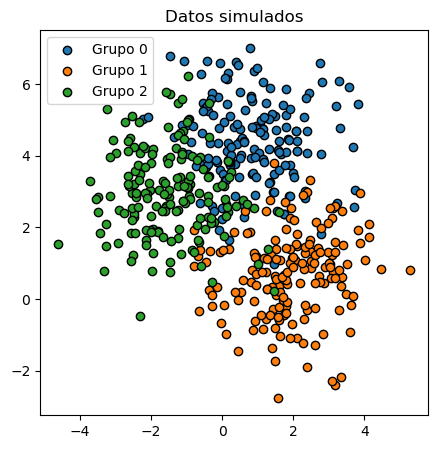

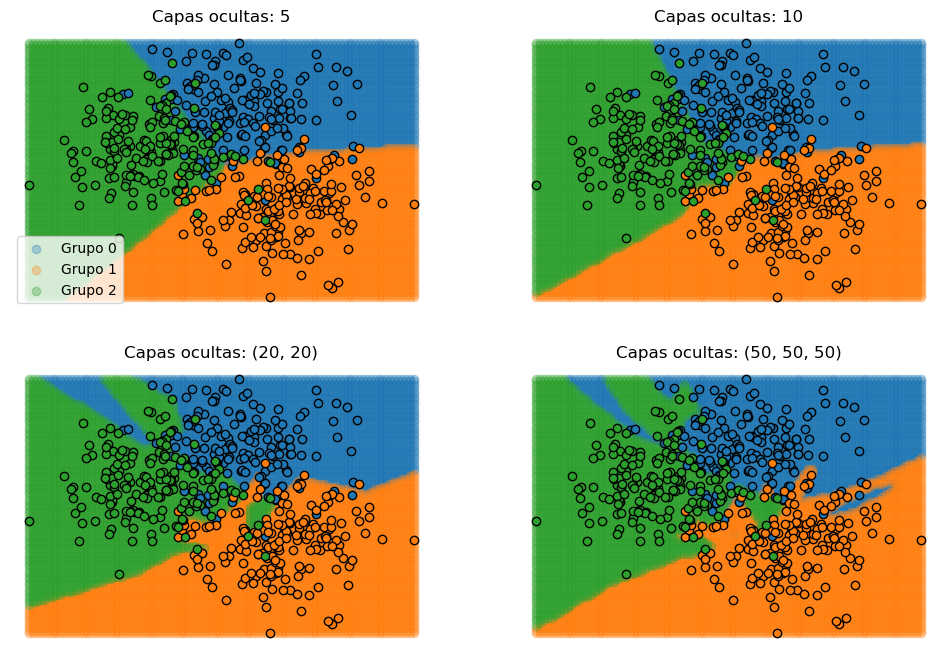

In [12]:
# Tratamiento de datos
# ==============================================================================
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt

# Modelado
# ==============================================================================
from sklearn.datasets import make_blobs
from sklearn.neural_network import MLPClassifier


# Datos simulados Se simulan observaciones en dos dimensiones, pertenecientes a tres grupos, cuya separación no es perfecta.
# ==============================================================================
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=3,
    cluster_std=1.2,
    shuffle=True,
    random_state=0,
)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
for i in np.unique(y):
    ax.scatter(
        x=X[y == i, 0],
        y=X[y == i, 1],
        c=plt.rcParams["axes.prop_cycle"].by_key()["color"][i],
        marker="o",
        edgecolor="black",
        label=f"Grupo {i}",
    )

ax.set_title("Datos simulados")
ax.legend()

# Modelos Se procede a crear 4 modelos en orden creciente de complejidad (número de neuronas y capas), para comprobar cómo la arquitectura de la red afecta a su capacidad de aprendizaje.
# ==============================================================================
modelo_1 = MLPClassifier(
    hidden_layer_sizes=(5),
    learning_rate_init=0.01,
    solver="lbfgs",
    max_iter=1000,
    random_state=123,
)

modelo_2 = MLPClassifier(
    hidden_layer_sizes=(10),
    learning_rate_init=0.01,
    solver="lbfgs",
    max_iter=1000,
    random_state=123,
)

modelo_3 = MLPClassifier(
    hidden_layer_sizes=(20, 20),
    learning_rate_init=0.01,
    solver="lbfgs",
    max_iter=5000,
    random_state=123,
)

modelo_4 = MLPClassifier(
    hidden_layer_sizes=(50, 50, 50),
    learning_rate_init=0.01,
    solver="lbfgs",
    max_iter=5000,
    random_state=123,
)

modelo_1.fit(X=X, y=y)
modelo_2.fit(X=X, y=y)
modelo_3.fit(X=X, y=y)
modelo_4.fit(X=X, y=y)

# Gráfico de predicciones
# ==============================================================================
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()
grid_x1 = np.linspace(start=min(X[:, 0]), stop=max(X[:, 0]), num=100)
grid_x2 = np.linspace(start=min(X[:, 1]), stop=max(X[:, 1]), num=100)
xx, yy = np.meshgrid(grid_x1, grid_x2)
X_grid = np.column_stack([xx.flatten(), yy.flatten()])

for i, modelo in enumerate([modelo_1, modelo_2, modelo_3, modelo_4]):

    predicciones = modelo.predict(X_grid)

    for j in np.unique(predicciones):
        axs[i].scatter(
            x=X_grid[predicciones == j, 0],
            y=X_grid[predicciones == j, 1],
            c=plt.rcParams["axes.prop_cycle"].by_key()["color"][j],
            # marker = 'o',
            alpha=0.3,
            label=f"Grupo {j}",
        )

    for j in np.unique(y):
        axs[i].scatter(
            x=X[y == j, 0],
            y=X[y == j, 1],
            c=plt.rcParams["axes.prop_cycle"].by_key()["color"][j],
            marker="o",
            edgecolor="black",
        )

    axs[i].set_title(f"Capas ocultas: {modelo.hidden_layer_sizes}")
    axs[i].axis("off")
axs[0].legend()

## Prueba por tu cuenta

La base de datos **Iris** es un conjunto de datos clásico utilizado frecuentemente en el aprendizaje estadístico y el aprendizaje automático. Fue introducido por el estadístico y biólogo británico **Ronald A. Fisher** en 1936.

### Descripción

- **Número de observaciones**: 150
- **Número de características**: 4
- **Número de clases**: 3

### Características

1. **Sepal.Length**: Longitud del sépalo (cm)
2. **Sepal.Width**: Anchura del sépalo (cm)
3. **Petal.Length**: Longitud del pétalo (cm)
4. **Petal.Width**: Anchura del pétalo (cm)

### Clases

- **Iris-setosa**
- **Iris-versicolor**
- **Iris-virginica**

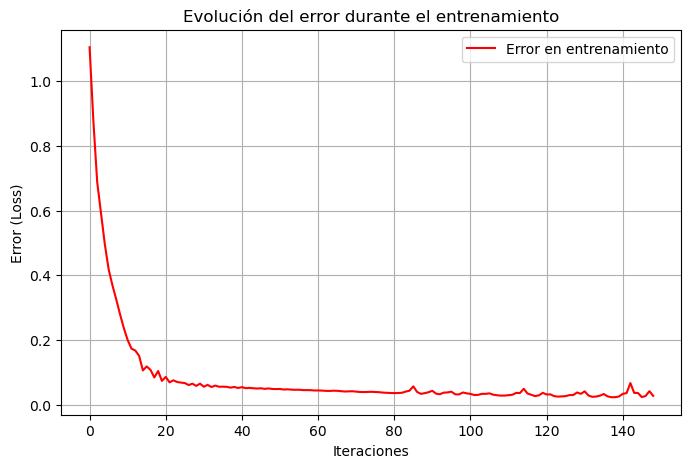

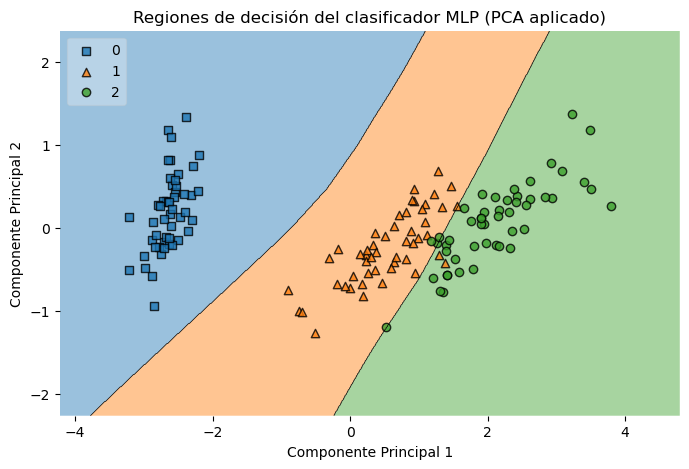

Accuracy: 0.9333333333333333
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.75      1.00      0.86         6
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.92      0.94      0.92        30
weighted avg       0.95      0.93      0.93        30

Confusion Matrix:
[[13  0  0]
 [ 0  6  0]
 [ 0  2  9]]


In [18]:
# Tratamiento de datos
# ==============================================================================
import numpy as np  # Importar la biblioteca numpy para manejo de arrays y funciones matemáticas

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt  # Importar matplotlib para crear gráficos

# Modelado
# ==============================================================================
from sklearn.neural_network import (
    MLPClassifier,
)  # Importar MLPClassifier de sklearn para redes neuronales
from sklearn import (
    datasets,
)  # Importar datasets de sklearn para cargar conjuntos de datos
from sklearn.model_selection import (
    train_test_split,
)  # Importar train_test_split de sklearn para dividir los datos en entrenamiento y prueba
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
)  # Importar métricas de evaluación de sklearn
from mlxtend.plotting import plot_decision_regions 
from sklearn.decomposition import PCA

# Importamos el conjunto de datos Iris
iris = datasets.load_iris()
X = iris.data  # Asignar las características a X
y = iris.target  # Asignar las etiquetas a y

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=123,  # 20% de los datos para prueba, semilla para reproducibilidad
)

# Crear el modelo
modelo = MLPClassifier(
    hidden_layer_sizes=(50, 50, 50),  # Tres capas ocultas con 50 neuronas cada una
    learning_rate_init=0.01,  # Tasa de aprendizaje inicial
    solver="adam",  # Algoritmo de optimización -> Cambiar a solver adam para poder guardar los errores
    max_iter=5000,  # Número máximo de iteraciones
    random_state=123,  # Semilla para reproducibilidad
)

# Entrenar el modelo
modelo.fit(X=X_train, y=y_train)

# Graficar el error en función de las iteraciones
plt.figure(figsize=(8, 5))
plt.plot(modelo.loss_curve_, label="Error en entrenamiento", color="red")
plt.xlabel("Iteraciones")
plt.ylabel("Error (Loss)")
plt.title("Evolución del error durante el entrenamiento")
plt.legend()
plt.grid()
plt.show()

# Hacer predicciones
y_pred = modelo.predict(X_test)

# Aplicar PCA para reducir las dimensiones a 2D (necesario para graficar)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Entrenar un nuevo modelo con los datos reducidos a 2D
modelo_pca = MLPClassifier(
    hidden_layer_sizes=(50, 50, 50),
    learning_rate_init=0.01,
    solver="adam",
    max_iter=5000,
    random_state=123
)

modelo_pca.fit(X_pca, y)  # Entrenar el modelo con los datos de PCA

# Graficar las regiones de decisión usando el modelo entrenado con 2 características
plt.figure(figsize=(8, 5))
plot_decision_regions(X_pca, y, clf=modelo_pca, legend=2)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Regiones de decisión del clasificador MLP (PCA aplicado)")
plt.show()


# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)  # Calcular la precisión
classification_rep = classification_report(
    y_test, y_pred
)  # Generar el informe de clasificación
conf_matrix = confusion_matrix(y_test, y_pred)  # Generar la matriz de confusión

# Imprimir los resultados
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)